In [1]:
# for this to work, need to make sure to launch jupyter-lab from the executable inside the venv
# like so:
# /home/dmarx/projects/ComfyUI/_venv/bin/jupyter-lab --port 8888 --ip 0.0.0.0 --ServerApp.token=$JUPYTER_TOKEN --no-browser

import os
import random
import sys
from typing import Sequence, Mapping, Any, Union
import torch


def get_value_at_index(obj: Union[Sequence, Mapping], index: int) -> Any:
    """Returns the value at the given index of a sequence or mapping.

    If the object is a sequence (like list or string), returns the value at the given index.
    If the object is a mapping (like a dictionary), returns the value at the index-th key.

    Some return a dictionary, in these cases, we look for the "results" key

    Args:
        obj (Union[Sequence, Mapping]): The object to retrieve the value from.
        index (int): The index of the value to retrieve.

    Returns:
        Any: The value at the given index.

    Raises:
        IndexError: If the index is out of bounds for the object and the object is not a mapping.
    """
    try:
        return obj[index]
    except KeyError:
        return obj["result"][index]


def find_path(name: str, path: str = None) -> str:
    """
    Recursively looks at parent folders starting from the given path until it finds the given name.
    Returns the path as a Path object if found, or None otherwise.
    """
    # If no path is given, use the current working directory
    if path is None:
        path = os.getcwd()

    # Check if the current directory contains the name
    if name in os.listdir(path):
        path_name = os.path.join(path, name)
        print(f"{name} found: {path_name}")
        return path_name

    # Get the parent directory
    parent_directory = os.path.dirname(path)

    # If the parent directory is the same as the current directory, we've reached the root and stop the search
    if parent_directory == path:
        return None

    # Recursively call the function with the parent directory
    return find_path(name, parent_directory)


def add_comfyui_directory_to_sys_path() -> None:
    """
    Add 'ComfyUI' to the sys.path
    """
    comfyui_path = find_path("ComfyUI") # just specify this explicitly, sheesh. environment variable.
    if comfyui_path is not None and os.path.isdir(comfyui_path):
        sys.path.append(comfyui_path)
        print(f"'{comfyui_path}' added to sys.path")


# The issue here is that main.py assumes we're running from the CLI
# def add_extra_model_paths() -> None:
# #async def add_extra_model_paths() -> None:
#     """
#     Parse the optional extra_model_paths.yaml file and add the parsed paths to the sys.path.
#     """
#     from main import load_extra_path_config

#     extra_model_paths = find_path("extra_model_paths.yaml")

#     if extra_model_paths is not None:
#         load_extra_path_config(extra_model_paths)
#     else:
#         print("Could not find the extra_model_paths config file.")


add_comfyui_directory_to_sys_path()
#add_extra_model_paths()
#await add_extra_model_paths()


# def import_custom_nodes() -> None:
#     """Find all custom nodes in the custom_nodes folder and add those node objects to NODE_CLASS_MAPPINGS

#     This function sets up a new asyncio event loop, initializes the PromptServer,
#     creates a PromptQueue, and initializes the custom nodes.
#     """
#     import asyncio
#     import execution
#     from nodes import init_custom_nodes
#     import server

#     # Creating a new event loop and setting it as the default loop
#     loop = asyncio.new_event_loop()
#     asyncio.set_event_loop(loop)

#     # Creating an instance of PromptServer with the loop
#     server_instance = server.PromptServer(loop)
#     execution.PromptQueue(server_instance)

#     # Initializing custom nodes
#     init_custom_nodes()


#from nodes import NODE_CLASS_MAPPINGS, SaveImage
#import_custom_nodes()

ComfyUI found: /home/dmarx/projects/ComfyUI
'/home/dmarx/projects/ComfyUI' added to sys.path


In [2]:
import asyncio


from comfy.options import enable_args_parsing
enable_args_parsing(False)

import server # hrm
import execution
from nodes import init_custom_nodes
from nodes import NODE_CLASS_MAPPINGS, SaveImage

### a bunch of node packs won't load correctly if PromptServer.instance doesn't exist

loop = asyncio.get_event_loop()
server_instance = server.PromptServer(loop)

# maybe this isn't needed?
execution.PromptQueue(server_instance)
init_custom_nodes()



Total VRAM 24260 MB, total RAM 31954 MB
Set vram state to: NORMAL_VRAM
Device: cuda:0 NVIDIA GeForce RTX 3090 : native
VAE dtype: torch.bfloat16


/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using pytorch cross attention
Package diffusers is already installed.
Traceback (most recent call last):
  File "/home/dmarx/projects/ComfyUI/nodes.py", line 1735, in load_custom_node
    module_spec.loader.exec_module(module)
  File "<frozen importlib._bootstrap_external>", line 883, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/home/dmarx/projects/ComfyUI/custom_nodes/ComfyUI_NestedNodeBuilder/__init__.py", line 97, in <module>
    @server.PromptServer.instance.routes.get('/nested_node_builder/nested_defs')
AttributeError: type object 'PromptServer' has no attribute 'instance'

Cannot import /home/dmarx/projects/ComfyUI/custom_nodes/ComfyUI_NestedNodeBuilder module for custom nodes: type object 'PromptServer' has no attribute 'instance'
### Loading: ComfyUI-Manager (V0.40)
### ComfyUI Revision: 1652 [656c0b5d] | Released on '2023-11-06'
Traceback (most recent call last):
  File "/home/dmarx/projects/ComfyUI/nodes.py", line 1735

/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)
[comfy_mtb] | INFO -> loaded 52 nodes successfuly
[comfy_mtb] | INFO -> Some nodes (7) could not be loaded. This can be ignored, but go to http://127.0.0.1:8188/mtb if you want more information.


WAS Node Suite: OpenCV Python FFMPEG support is enabled
WAS Node Suite Warning: `ffmpeg_bin_path` is not set in `/home/dmarx/projects/ComfyUI/custom_nodes/was-node-suite-comfyui/was_suite_config.json` config file. Will attempt to use system ffmpeg binaries if available.
WAS Node Suite: Finished. Loaded 197 nodes successfully.

	"Art is not what you see, but what you make others see." - Edgar Degas


Import times for custom nodes:
   0.0 seconds: /home/dmarx/projects/ComfyUI/custom_nodes/ComfyUI_Noise
   0.0 seconds: /home/dmarx/projects/ComfyUI/custom_nodes/ComfyUI_Cutoff
   0.0 seconds (IMPORT FAILED): /home/dmarx/projects/ComfyUI/custom_nodes/ComfyUI_FizzNodes
   0.0 seconds: /home/dmarx/projects/ComfyUI/custom_nodes/ComfyUI-ricing
   0.0 seconds: /home/dmarx/projects/ComfyUI/custom_nodes/sd-dynamic-thresholding
   0.0 seconds (IMPORT FAILED): /home/dmarx/projects/ComfyUI/custom_nodes/ComfyUI-OpenPose-Editor
   0.0 seconds: /home/dmarx/projects/ComfyUI/custom_nodes/LoRA-Merger-ComfyU

In [3]:
import sys
sys.path # this isn't the python it's supposed to be... OH RIGHT, i used the "jupylab" command. fml.

['/home/dmarx/projects/ComfyUI/custom_nodes/ComfyUI-Frame-Interpolation',
 '/home/dmarx/projects/ComfyUI/custom_nodes/was-node-suite-comfyui/was_node_suite_comfyui',
 '/home/dmarx/projects/ComfyUI/custom_nodes/ComfyUI-Custom-Scripts',
 '/home/dmarx/projects/ComfyUI/custom_nodes/ComfyUI_Comfyroll_CustomNodes/nodes/comfy',
 '/home/dmarx/projects/ComfyUI/custom_nodes/ComfyUI_Comfyroll_CustomNodes/nodes/comfy',
 '/home/dmarx/projects/ComfyUI/custom_nodes/ComfyUI_Comfyroll_CustomNodes/nodes/comfy',
 '/home/dmarx/projects/ComfyUI/custom_nodes/ComfyUI_Comfyroll_CustomNodes/nodes/comfy',
 '/home/dmarx/projects/ComfyUI/custom_nodes/comfyui_controlnet_aux/src/controlnet_aux',
 '/home/dmarx/projects/ComfyUI/custom_nodes/comfyui_controlnet_aux/src/custom_detectron2',
 '/home/dmarx/projects/ComfyUI/custom_nodes/comfyui_controlnet_aux/src/__init__.py',
 '/home/dmarx/projects/ComfyUI/custom_nodes/comfyui_controlnet_aux/src/custom_midas_repo',
 '/home/dmarx/projects/ComfyUI/custom_nodes/comfyui_contro

In [4]:
with torch.inference_mode():
    ### "imports"
    clipseg = NODE_CLASS_MAPPINGS["CLIPSeg"]()
    image_load = NODE_CLASS_MAPPINGS["Image Load"]()
    mediapipe_facemeshpreprocessor = NODE_CLASS_MAPPINGS[
        "MediaPipe-FaceMeshPreprocessor"
    ]()
    mediapipefacemeshtosegs = NODE_CLASS_MAPPINGS["MediaPipeFaceMeshToSEGS"]()
    segstocombinedmask = NODE_CLASS_MAPPINGS["SegsToCombinedMask"]()
    masktoimage = NODE_CLASS_MAPPINGS["MaskToImage"]()
    masktosegs = NODE_CLASS_MAPPINGS["MaskToSEGS"]()
    samdetectorcombined = NODE_CLASS_MAPPINGS["SAMDetectorCombined"]()
    invertmask = NODE_CLASS_MAPPINGS["InvertMask"]()
    impactdilatemask = NODE_CLASS_MAPPINGS["ImpactDilateMask"]()
    subtractmask = NODE_CLASS_MAPPINGS["SubtractMask"]()
    imagecompositemasked = NODE_CLASS_MAPPINGS["ImageCompositeMasked"]()
    #image_color_palette = NODE_CLASS_MAPPINGS["Image Color Palette"]()
    imageblur = NODE_CLASS_MAPPINGS["ImageBlur"]()
    imagesharpen = NODE_CLASS_MAPPINGS["ImageSharpen"]()
    imagetomask = NODE_CLASS_MAPPINGS["ImageToMask"]()
    tobinarymask = NODE_CLASS_MAPPINGS["ToBinaryMask"]()
    samloader = NODE_CLASS_MAPPINGS["SAMLoader"]()
    saveimage = SaveImage()

    samloader_29 = samloader.load_model(
        model_name="sam_vit_b_01ec64.pth", device_mode="Prefer GPU"
    )

    #saveimage_82 = saveimage.save_images(filename_prefix="maskSkinTone")

    image_load_130 = image_load.load_image(
        image_path="/home/dmarx/projects/whats-in-a-name/images/a_photo_of_adele_portrait_photography_full_color_face_full_frame/1695441053_3.png",
        RGBA="false",
        filename_text_extension="true",
    )
    
    input_image_data = image_load_130[0]

Loads SAM model: /home/dmarx/projects/ComfyUI/models/sams/sam_vit_b_01ec64.pth (device:Prefer GPU)


In [5]:
with torch.inference_mode():
    ################
    # isolate face #
    ################
    
    #mediapipe_facemeshpreprocessor_11 = mediapipe_facemeshpreprocessor.detect(
    detected_facemesh = mediapipe_facemeshpreprocessor.detect(
        max_faces=10,
        min_confidence=0.5,
        resolution=512,
        image=input_image_data #get_value_at_index(image_load_130, 0),
    )[0]
    
    #mediapipefacemeshtosegs_28 = mediapipefacemeshtosegs.doit(
    face_segs = mediapipefacemeshtosegs.doit(
        crop_factor=3,
        bbox_fill=False,
        crop_min_size=50,
        drop_size=1,
        dilation=0,
        face=True,
        mouth=False,
        left_eyebrow=False,
        left_eye=False,
        left_pupil=False,
        right_eyebrow=False,
        right_eye=False,
        right_pupil=False,
        image=detected_facemesh
    )[0]
    
    #segstocombinedmask_25 = segstocombinedmask.doit(
    face_mask0 = segstocombinedmask.doit(
        segs=face_segs
    )[0]

# of Detected SEGS: 1


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [6]:
with torch.inference_mode():
    ################
    # isolate hair #
    ################
    hair_clipseg = clipseg.segment_image(
                image=input_image_data,
                text="hair",
                blur=7,
                threshold=0.4,
                dilation_factor=4,
            )
    hair_mask0 = hair_clipseg[0] #clipseg_8[0]
    hair_segs = masktosegs.doit(
            combined=False,
            crop_factor=3,
            bbox_fill=False,
            drop_size=10,
            mask=hair_mask0,
        )[0]
    #samdetectorcombined_30 = samdetectorcombined.doit(
    hair_mask1 = samdetectorcombined.doit(
            detection_hint="center-1",
            dilation=0,
            threshold=0.93,
            bbox_expansion=0,
            mask_hint_threshold=0.7,
            mask_hint_use_negative="False",
            sam_model=samloader_29[0], #get_value_at_index(samloader_29, 0),
            segs=hair_segs, #get_value_at_index(masktosegs_32, 0),
            image=input_image_data, #get_value_at_index(image_load_130, 0),
        )[0]
    
    ### shrink the hair mask ### TODO: simplify
    invertmask_69 = invertmask.invert(
            mask=hair_mask1
        )[0]
    impactdilatemask_72 = impactdilatemask.doit(
            dilation=50, mask=invertmask_69
        )[0]
    #invertmask_73 = invertmask.invert(
    hair_mask2 = invertmask.invert(
            mask=impactdilatemask_72
        )[0]


    ### exclude face outline from hair mask
    ###  TODO: this doesn't need to be achieved through comfy
    #subtractmask_133 = subtractmask.doit(
    hair_mask3 = subtractmask.doit(
            mask1=hair_mask2, #get_value_at_index(invertmask_73, 0),
            mask2=face_mask0 #get_value_at_index(segstocombinedmask_25, 0),
        )[0]

    # masktoimage_134 = masktoimage.mask_to_image(
    #     mask=get_value_at_index(subtractmask_133, 0)
    # )

    # saveimage_83 = saveimage.save_images(
    #         filename_prefix="maskHair",
    #         images=get_value_at_index(masktoimage_134, 0),
    #     )

# of Detected SEGS: 1


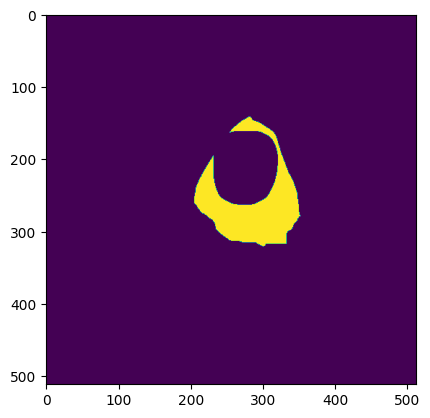

In [7]:
import matplotlib.pyplot as plt

plt.imshow(hair_mask3.detach().cpu())

In [9]:
with torch.inference_mode():
    ################
    # isolate skin #
    ################

    # face parts to ignore
    mediapipefacemeshtosegs_24 = mediapipefacemeshtosegs.doit(
        crop_factor=3,
        bbox_fill=True,
        crop_min_size=50,
        drop_size=1,
        dilation=0,
        face=False,
        mouth=True,
        left_eyebrow=True,
        left_eye=True,
        left_pupil=False,
        right_eyebrow=True,
        right_eye=True,
        right_pupil=False,
        #image=get_value_at_index(mediapipe_facemeshpreprocessor_11, 0),
        image=detected_facemesh,
    )[0]

    face_holes = segstocombinedmask.doit(
        segs=mediapipefacemeshtosegs_24
    )[0]

    # TO DO: shrink face before subtraction
    
    skin_mask0 = subtractmask.doit(
            mask1=face_mask0, #get_value_at_index(invertmask_73, 0),
            mask2=face_holes #get_value_at_index(segstocombinedmask_25, 0),
        )[0]

# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1
# of Detected SEGS: 1


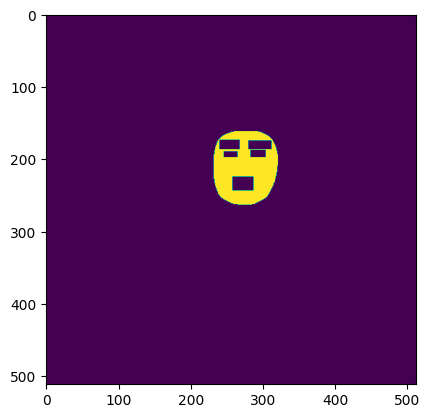

In [10]:
plt.imshow(skin_mask0.detach().cpu())

In [ ]:
### TODO: improve iris extraction by placing circles at locii given by pupil detection
# for now: face extraction is most of what i want anyway.

In [12]:
#%pip install colorspacious

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Note: you may need to restart the kernel to use updated packages.


In [13]:
from colorspacious import cspace_convert, cspace_converter

In [23]:
input_image_data[skin_mask0.unsqueeze(0)==1].shape

face_masked_cie = cspace_convert(input_image_data[skin_mask0.unsqueeze(0)==1], "sRGB1", "CIELab")
mu_cielab = face_masked_cie.mean(axis=0) # well, that sure is quite different.
mu_cielab

mu_rgb = cspace_convert(mu_cielab, "CIELab", "sRGB255")
mu_rgb = mu_rgb.round().astype('int')
print(mu_rgb)

[202 182 175]


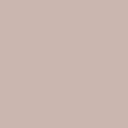

In [25]:
from PIL import Image
skin_tone = Image.new('RGB', (128,128))
skin_tone.paste( tuple(mu_rgb), (0, 0, skin_tone.size[0], skin_tone.size[1]))
skin_tone

In [ ]:
impath = "/home/dmarx/projects/whats-in-a-name/images/a_photo_of_adele_portrait_photography_full_color_face_full_frame/1695441053_3.png"

Image.open(impath)


# Refactored and cleaned up

In [2]:
def init_comfy(
    comfyui_path = "/home/dmarx/projects/ComfyUI"
):
    # 1. add ComyUI to path
    import sys
    sys.path.append(comfyui_path)

    # 2. ensure cli parser doesn't cause issues
    from comfy.options import enable_args_parsing
    enable_args_parsing(False)
    
    # 3. spin up custom nodes and prompt server
    import asyncio
    import server
    import execution
    from nodes import init_custom_nodes
    
    loop = asyncio.get_event_loop()
    server_instance = server.PromptServer(loop)
    execution.PromptQueue(server_instance)
    init_custom_nodes()

init_comfy()
from nodes import NODE_CLASS_MAPPINGS
import torch

Total VRAM 24260 MB, total RAM 31954 MB
Set vram state to: NORMAL_VRAM
Device: cuda:0 NVIDIA GeForce RTX 3090 : native
VAE dtype: torch.bfloat16


/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using pytorch cross attention
Package diffusers is already installed.
### Loading: ComfyUI-Manager (V0.40)
### ComfyUI Revision: 1652 [656c0b5d] | Released on '2023-11-06'
Traceback (most recent call last):
  File "/home/dmarx/projects/ComfyUI/nodes.py", line 1735, in load_custom_node
    module_spec.loader.exec_module(module)
  File "<frozen importlib._bootstrap_external>", line 883, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/home/dmarx/projects/ComfyUI/custom_nodes/ComfyUI_FizzNodes/__init__.py", line 14, in <module>
    extentions_folder = os.path.join(os.path.dirname(os.path.realpath(__main__.__file__)),
AttributeError: module '__main__' has no attribute '__file__'. Did you mean: '__name__'?

Cannot import /home/dmarx/projects/ComfyUI/custom_nodes/ComfyUI_FizzNodes module for custom nodes: module '__main__' has no attribute '__file__'
Traceback (most recent call last):
  File "/home/dmarx/projects/ComfyUI/nodes.py", line 1

/home/dmarx/projects/ComfyUI/_venv/lib/python3.10/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)
[comfy_mtb] | INFO -> loaded 52 nodes successfuly
[comfy_mtb] | INFO -> Some nodes (7) could not be loaded. This can be ignored, but go to http://127.0.0.1:8188/mtb if you want more information.


WAS Node Suite: OpenCV Python FFMPEG support is enabled
WAS Node Suite Warning: `ffmpeg_bin_path` is not set in `/home/dmarx/projects/ComfyUI/custom_nodes/was-node-suite-comfyui/was_suite_config.json` config file. Will attempt to use system ffmpeg binaries if available.
WAS Node Suite: Finished. Loaded 197 nodes successfully.

	"Every great dream begins with a dreamer." - Harriet Tubman


Import times for custom nodes:
   0.0 seconds: /home/dmarx/projects/ComfyUI/custom_nodes/ComfyUI-ricing
   0.0 seconds: /home/dmarx/projects/ComfyUI/custom_nodes/ComfyUI_Noise
   0.0 seconds (IMPORT FAILED): /home/dmarx/projects/ComfyUI/custom_nodes/ComfyUI_FizzNodes
   0.0 seconds: /home/dmarx/projects/ComfyUI/custom_nodes/sd-dynamic-thresholding
   0.0 seconds (IMPORT FAILED): /home/dmarx/projects/ComfyUI/custom_nodes/ComfyUI-OpenPose-Editor
   0.0 seconds: /home/dmarx/projects/ComfyUI/custom_nodes/ComfyUI_Cutoff
   0.0 seconds: /home/dmarx/projects/ComfyUI/custom_nodes/ComfyUI_NestedNodeBuilder
   

In [ ]:
with torch.inference_mode():
    ### "imports"
    clipseg = NODE_CLASS_MAPPINGS["CLIPSeg"]()
    image_load = NODE_CLASS_MAPPINGS["Image Load"]()
    mediapipe_facemeshpreprocessor = NODE_CLASS_MAPPINGS[
        "MediaPipe-FaceMeshPreprocessor"
    ]()
    mediapipefacemeshtosegs = NODE_CLASS_MAPPINGS["MediaPipeFaceMeshToSEGS"]()
    segstocombinedmask = NODE_CLASS_MAPPINGS["SegsToCombinedMask"]()
    masktoimage = NODE_CLASS_MAPPINGS["MaskToImage"]()
    masktosegs = NODE_CLASS_MAPPINGS["MaskToSEGS"]()
    samdetectorcombined = NODE_CLASS_MAPPINGS["SAMDetectorCombined"]()
    invertmask = NODE_CLASS_MAPPINGS["InvertMask"]()
    impactdilatemask = NODE_CLASS_MAPPINGS["ImpactDilateMask"]()
    subtractmask = NODE_CLASS_MAPPINGS["SubtractMask"]()
    imagecompositemasked = NODE_CLASS_MAPPINGS["ImageCompositeMasked"]()
    #image_color_palette = NODE_CLASS_MAPPINGS["Image Color Palette"]()
    imageblur = NODE_CLASS_MAPPINGS["ImageBlur"]()
    imagesharpen = NODE_CLASS_MAPPINGS["ImageSharpen"]()
    imagetomask = NODE_CLASS_MAPPINGS["ImageToMask"]()
    tobinarymask = NODE_CLASS_MAPPINGS["ToBinaryMask"]()
    samloader = NODE_CLASS_MAPPINGS["SAMLoader"]()
    saveimage = SaveImage()

    
    samloader_29 = samloader.load_model(
        model_name="sam_vit_b_01ec64.pth", device_mode="Prefer GPU"
    )

def masks_from_image(image: torch.tensor):
    """
    Returns masks (e.g. for skin, hair, eyes) for color analysis
    """
    with torch.inference_mode():
        #mediapipe_facemeshpreprocessor_11 = mediapipe_facemeshpreprocessor.detect(
        detected_facemesh = mediapipe_facemeshpreprocessor.detect(
            max_faces=10,
            min_confidence=0.5,
            resolution=512,
            image=input_image_data #get_value_at_index(image_load_130, 0),
        )[0]

        def get_face():
            #mediapipefacemeshtosegs_28 = mediapipefacemeshtosegs.doit(
            face_segs = mediapipefacemeshtosegs.doit(
                crop_factor=3,
                bbox_fill=False,
                crop_min_size=50,
                drop_size=1,
                dilation=0,
                face=True,
                mouth=False,
                left_eyebrow=False,
                left_eye=False,
                left_pupil=False,
                right_eyebrow=False,
                right_eye=False,
                right_pupil=False,
                image=detected_facemesh
            )[0]
            
            #segstocombinedmask_25 = segstocombinedmask.doit(
            face_mask0 = segstocombinedmask.doit(
                segs=face_segs
            )[0]

            return face_mask0


        def get_hair():
    
            hair_clipseg = clipseg.segment_image(
                        image=input_image_data,
                        text="hair",
                        blur=7,
                        threshold=0.4,
                        dilation_factor=4,
                    )
            hair_mask0 = hair_clipseg[0] #clipseg_8[0]
            hair_segs = masktosegs.doit(
                    combined=False,
                    crop_factor=3,
                    bbox_fill=False,
                    drop_size=10,
                    mask=hair_mask0,
                )[0]
            #samdetectorcombined_30 = samdetectorcombined.doit(
            hair_mask1 = samdetectorcombined.doit(
                    detection_hint="center-1",
                    dilation=0,
                    threshold=0.93,
                    bbox_expansion=0,
                    mask_hint_threshold=0.7,
                    mask_hint_use_negative="False",
                    sam_model=samloader_29[0], #get_value_at_index(samloader_29, 0),
                    segs=hair_segs, #get_value_at_index(masktosegs_32, 0),
                    image=input_image_data, #get_value_at_index(image_load_130, 0),
                )[0]
            
            ### shrink the hair mask ### TODO: simplify
            invertmask_69 = invertmask.invert(
                    mask=hair_mask1
                )[0]
            impactdilatemask_72 = impactdilatemask.doit(
                    dilation=50, mask=invertmask_69
                )[0]
            #invertmask_73 = invertmask.invert(
            hair_mask2 = invertmask.invert(
                    mask=impactdilatemask_72
                )[0]
        
        
            ### exclude face outline from hair mask
            ###  TODO: this doesn't need to be achieved through comfy
            #subtractmask_133 = subtractmask.doit(
            hair_mask3 = subtractmask.doit(
                    mask1=hair_mask2, #get_value_at_index(invertmask_73, 0),
                    mask2=face_mask0 #get_value_at_index(segstocombinedmask_25, 0),
                )[0]
        
            # masktoimage_134 = masktoimage.mask_to_image(
            #     mask=get_value_at_index(subtractmask_133, 0)
            # )
        
            # saveimage_83 = saveimage.save_images(
            #         filename_prefix="maskHair",
            #         images=get_value_at_index(masktoimage_134, 0),
            #     )

            return hair_mask3
        
        
        def get_skin():
            ################
            # isolate skin #
            ################
        
            # face parts to ignore
            mediapipefacemeshtosegs_24 = mediapipefacemeshtosegs.doit(
                crop_factor=3,
                bbox_fill=True,
                crop_min_size=50,
                drop_size=1,
                dilation=0,
                face=False,
                mouth=True,
                left_eyebrow=True,
                left_eye=True,
                left_pupil=False,
                right_eyebrow=True,
                right_eye=True,
                right_pupil=False,
                #image=get_value_at_index(mediapipe_facemeshpreprocessor_11, 0),
                image=detected_facemesh,
            )[0]
        
            face_holes = segstocombinedmask.doit(
                segs=mediapipefacemeshtosegs_24
            )[0]

            face_mask0 = get_face()
            # TO DO: shrink face before subtraction
            
            skin_mask0 = subtractmask.doit(
                    mask1=face_mask0, #get_value_at_index(invertmask_73, 0),
                    mask2=face_holes #get_value_at_index(segstocombinedmask_25, 0),
                )[0]
        
            ### TODO: improve iris extraction by placing circles at locii given by pupil detection
            # for now: face extraction is most of what i want anyway.

            return skin_mask0

    return {'hair':get_hair(), 'skin':get_skin(), 'left_eye':None, 'right_eye':None}